# Phyiscs Problems - Lectures 18 & 19 - Homework 9 

FALL 2023


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a program that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [1]:
import math

T = float(input("Enter desired value of Period T: "))
G = 6.67*10**(-11)
M = 5.97*10**(24)
R = 6371*1000
h = ((G*M*(T**2))/(4*math.pi*math.pi))**(1/3) - R
print(h)



Enter desired value of Period T: 10
-6270712.499022588


Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [2]:
T_45 = 45*60
T_90 = 90*60
T_Day = 24*60*60
G = 6.67*10**(-11)
M = 5.97*10**(24)
R = 6371*1000
h = ((G*M*(T**2))/(4*math.pi*math.pi))**(1/3) - R
for i in range(3):
    if i == 2:
        h = ((G*M*((T_45)**2))/(4*(math.pi**2)))**(1/3) - R
        print(h)
    elif i ==1:
        h = ((G*M*((T_90)**2))/(4*(math.pi**2)))**(1/3) - R
        print(h)
    else:
        h = ((G*M*((T_Day)**2))/(4*(math.pi**2)))**(1/3) - R
        print(h)
        
print('In conclusion, larger periods, (meaning that it takes longer), yield larger height values of h. If the period is too fast, then  you will get negative heights, meaning you are in the earth, which is impossible.')

35855910.17617497
279321.62537285965
-2181559.8978108233
In conclusion, larger periods, (meaning that it takes longer), yield larger height values of h. If the period is too fast, then  you will get negative heights, meaning you are in the earth, which is impossible.


Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [3]:
T_Geo = 23.93*60*60
T_Day = 24*60*60
G = 6.67*10**(-11)
M = 5.97*10**(24)
R = 6371*1000
h_Geo = ((G*M*(T_Geo**2))/(4*math.pi*math.pi))**(1/3) - R
h_Day = ((G*M*(T_Day**2))/(4*math.pi*math.pi))**(1/3) - R
diff = h_Day - h_Geo
print(h_Day, h_Geo, diff)

35855910.17617497 35773762.329895645 82147.8462793231


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heeghts with times less than geosynchronous in blue and those longer in green.

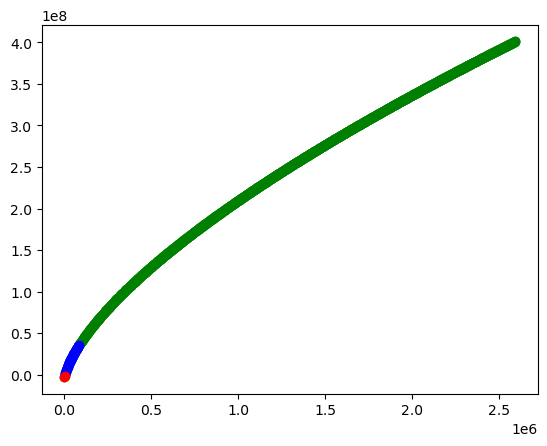

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange
from pylab import plot,xlabel,ylabel,show

#Constants

T_Start = 30*60
T_End = 30*24*60*60 + 30*60
G = 6.67*10**(-11)
M = 5.97*10**(24)
R = 6371*1000
h_Geo = ((G*M*(T_Geo**2))/(4*math.pi*math.pi))**(1/3) - R

# Lists of plot points
h = 30*60
tpoints = arange(T_Start,T_End, h) # make time array
Heights = [] # empty array to store the height value at each time step


T = T_Start
while T != T_End:
    h = ((G*M*(T**2))/(4*math.pi*math.pi))**(1/3) - R
    #print(h)
    Heights.append(h)
    T += (30*60)
    if T == T_End:
        break
Heights = np.array(Heights)
#Mask
keep_r = (Heights < 0)
keep_b = (Heights > 0) & (tpoints < 86400)
keep_g = (Heights >= h_Geo)
tpoints = np.array(tpoints)
plt.scatter(tpoints, Heights, c='g')
plt.scatter(tpoints[keep_b], Heights[keep_b], c='b')
plt.scatter(tpoints[keep_r], Heights[keep_r], c='r')

#plot
#plot(tpoints, Heights, c='m') # plot Height vs. time
#xlabel("Time")
#ylabel("Height")
show()

### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [21]:
import numpy as np
x_rest = float(input("What is the distance of the other planet in lightyears: "))
v_rest = float(input("What is the speed of the spaceship as as fraction of the speed of light: "))
gamma = (1-(v_rest)**2)**(1/2)
t_rest = x_rest/v_rest

t_ship = gamma*(t_rest-(v_rest*x_rest)/(3*10**(8)))
print(t_rest, t_ship)

What is the distance of the other planet in lightyears: 10
What is the speed of the spaceship as as fraction of the speed of light: 0.9
11.11111111111111 4.843221035301828


#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

In [6]:
import numpy as np
x_rest = float(input("What is the distance of the other planet in lightyears: "))
v_rest = float(input("What is the speed of the spaceship as as fraction of the speed of light: "))
gamma = 1/(1-(v_rest)**2)**(1/2)
t_rest = x_rest/v_rest

t_ship = gamma*(t_rest-(v_rest*x_rest))
print(t_rest, t_ship)

What is the distance of the other planet in lightyears: 0.9
What is the speed of the spaceship as as fraction of the speed of light: 0.98
0.9183673469387755 0.18275279457060353


### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [7]:
a = float(input("What is the coefficient in from of your x squared variable: "))
b = float(input("What is the coefficient in front of your x variable: "))
c = float(input("What is the coefficient without an x variable: "))

x_pos = (-b + ((b**2) - (4 * a * c))**(1/2))/(2*a)

x_neg = (-b - ((b**2) - 4 * a * c)**(1/2))/(2*a)

print(x_pos, x_neg)

What is the coefficient in from of your x squared variable: 2
What is the coefficient in front of your x variable: 3
What is the coefficient without an x variable: 4
(-0.7499999999999999+1.1989578808281798j) (-0.7500000000000001-1.1989578808281798j)


There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

In [8]:
a = float(input("What is the coefficient in from of your x squared variable: "))
b = float(input("What is the coefficient in front of your x variable: "))
c = float(input("What is the coefficient without an x variable: "))

x_pos = (2*c)/(-b + ((b**2) - (4 * a * c))**(1/2))
x_neg = (2*c)/(-b - ((b**2) - (4 * a * c))**(1/2))

print(x_pos, x_neg)

#it seems that there is some sort of rounding or truncation error in the opposite direction of the traditional method

What is the coefficient in from of your x squared variable: 1
What is the coefficient in front of your x variable: 2
What is the coefficient without an x variable: 3
(-0.9999999999999998-1.4142135623730951j) (-0.9999999999999998+1.414213562373095j)


Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases.

### 4) Planetary orbits

The orbit in space of one body around another, such as a planet around the Sun, need not be circular. In general it takes the form of an ellipse, with the body sometimes closer in and sometimes further out. If you are given the distance $l_1$ of closest approach that a planet makes to the Sun, also called its perihelion, and its linear velocity $v_1$ at *perihelion*, then any other property of the orbit can be calculated from these two as follows.

Kepler’s second law tells us that the distance $l_2$ and velocity $v_2$ of the planet at its most distant point, or *aphelion*, satisfy $l_2 v_2 = l_1 v_1$. 


Given the values of $v_1$, $l_1$, and $l_2$, other parameters of the orbit are given by simple formulas can that be derived from Kepler’s laws and the fact that the orbit is an ellipse:

Semi-Major Axis $$ a = \frac{1}{2} (l_1 + l_2) $$ 
Semi-Minor Axis: $$ b = \sqrt{l_1  l_2} $$ 
Orbital Period: $$ T = \frac{2 \pi a b}{l_1 v_1} $$ 
Orbital eccentricity:  $$ e = \frac{l_2 - l_1}{l_2 + l_1}$$

#### Write a program with functions that asks the user to enter the distance to the Sun and velocity at perihelion, then calculates and prints the quantities $l2$, $v2$, $a$, $b$, $T$, and $e$.




In [10]:
import math
#functions

def aVal(x, y):
    a = 0.5 * x * y
    return a
def bVal(x, y):
    b = (x*y)**(1/2)
    return b
def period(x, y, z, t):
    T = (2 * math.pi * x * y)/(z*t)
    return T
def eccen(x, y):
    ec = (y - x)/(y + x)
    return ec
def vel(l1, v1):
    G = 6.6*10**(-11)
    M = 6*10**(24)
    a = 1
    b = -2*G*M/(l1*v1)
    c = (2*G*M)/l1 - v1**2
    v_pos = (-b + (b**2 - 4*a*c)**(1/2))/(2*a)
    v_neg = (-b - (b**2 - 4*a*c)**(1/2))/(2*a)
    if v_pos < 0:
        return v_neg
    else:
        return v_pos
    
#inputs/constants
G = 6.6*10**(-11)
M = 6*10**(24)
v_1 = float(input("What is the v_1 value: "))
l_1 = float(input("What is the l_1 value: "))
l_2 = float(input("What is the l_2 value: "))

#determine unknowns
a = aVal(l_1, l_2)
print (a)
b = bVal(l_1, l_2)
print(b)
T = period(a, b, l_1, v_1)
print(T)
e = eccen(l_1, l_2)
print(e)
v2 = vel(l_1, v_1)

What is the v_1 value: 21
What is the l_1 value: 3
What is the l_2 value: 6
9.0
4.242640687119285
3.8081853755643134
0.3333333333333333


#### Test your program by having it calculate the properties of the orbits of the Earth (for which $l_1 = 1.4710 \times 10^{11}$ m and $v_1 = 3.0287 \times 10^4$ m s$^{−1}$ ) and Halley’s comet ($l_1 = 8.7830 \times 10^{10}$ m and $v_1 = 5.4529 \times 10^4$ m s${−1}$ ). Among other things, you should find that the orbital period of the Earth is one year and that of Halley’s comet is about 76 years.

In [51]:
import math
#functions

def aVal(x, y):
    a = 0.5 * (x + y)
    return a
def bVal(x, y):
    b = (x*y)**(1/2)
    return b
def period(x, y, z, t):
    T = (2 * math.pi * x * y)/(z*t)
    return T
def eccen(x, y):
    ec = (y - x)/(y + x)
    return ec
def vel(l1, v1):
    G = 6.6*10**(-11)
    M = 2e30
    a = 1
    b = (-1*2*G*M)/(l1*v1)
    c = (2*G*M)/l1 - v1**2
    v_pos = (-b + (b**2 - 4*a*c)**(1/2))/(2*a)
    v_neg = (-b - (b**2 - 4*a*c)**(1/2))/(2*a)
    if v_pos < v_neg:
        return v_pos
    else:
        return v_neg
def params(l1, v1):
    v2 = vel(l1, v1)
    l2 = l1*v1/v2
    a = aVal(l1, l2)
    b = bVal(l1, l2)
    T = period(a, b, l1, v1)
    Ty = T/(60*60*24*365)
    e = eccen(l1, l2)
    print(v2, l2, a, b, Ty, e)
#inputs/constants
l_1 = 8.783e10
v_1 = 5.4529e4

In [52]:
params(l_1, v_1)

594.0844501083993 8061618292022.5 4074724146011.25 841458219157.8713 142.63746607849367 0.9784451666290154
